*pas dit blok aan (dubbelklik om te wijzigen)*

# 2020 Diffusie werkcollege opdracht
***

## Datum: 06-feb-2020
## Hoofdstuk: 1
## Groep nummer: 32
***
## Student 1
    naam: Julian van Doorn
    Studentnr: s2518074

## Student 2
    naam: Wout Goesaert
    Studentnr: s2505479


In [144]:
# Dit blok moet altijd als eerste worden uitgevoerd. Verwijder het dus niet!
# voer blokken uit met shift-enter, of met de ▶-knop in de knoppenbalk

from __future__ import division

import matplotlib.pyplot as plt
import numpy as np
from cmath import sqrt
%matplotlib inline

In [145]:
# Vraag 1.3 a

amount = 100000
data = np.random.choice([1,2,3,4,5,6], 5 * amount)
data = np.resize(data, (amount, 5))

sum = 0  # Het aantal werp sets data 5 keer hetzelfde getal opbracht
for n in range(amount):  # Loop over all werp sets
    if (data[n] == data[n][0]).all():
        sum += 1 # If they are all equal to i add one to sum
print(f'Sum = {sum}; Sum / Amount = {sum/amount}')

Sum = 87; Sum / Amount = 0.00087


Vraag 1.3 b

De klassieke kans op Yahtzee is 1/1296 = 0.00077. Dus dit is hetzelfde resultaat als hierboven ongeveer.

Text(0.5, 0, 'Time (years)')

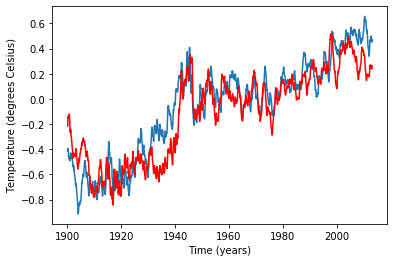

In [146]:
# Vraag 1.4 a / b 
year, temp_atlantic, temp_pacific = np.loadtxt('data/Ocean_surface_temp.csv', unpack=True)

plt.plot(year, temp_atlantic, label='Atlantic') # a
plt.plot(year, temp_pacific, color='red', label='Pacific') # b

plt.ylabel('Temperature (degrees Celsius)') # b
plt.xlabel('Time (years)') # b

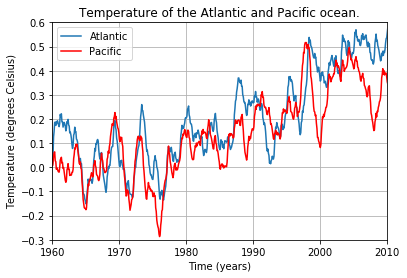

In [147]:
# Vraag 1.4 c / d / e
plt.plot(year, temp_atlantic, label='Atlantic')
plt.plot(year, temp_pacific, color='red', label='Pacific')

plt.ylabel('Temperature (degrees Celsius)')
plt.xlabel('Time (years)')

plt.axis(xmin=1960, xmax=2010, ymin=-0.3, ymax=0.6) # c

plt.title("Temperature of the Atlantic and Pacific ocean.")

plt.grid() # d
plt.legend() # e


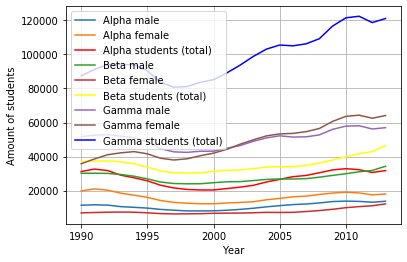

In [148]:
# Vraag 1.5 a
year, alpha_male, alpha_female, beta_male, beta_female, gamma_male, gamma_female = np.loadtxt('data/Ingeschrevenen_hoger_onderwijs.csv', unpack=True)

plt.plot(year, alpha_male, label='Alpha male')
plt.plot(year, alpha_female, label='Alpha female')
plt.plot(year, alpha_male + alpha_female, label='Alpha students (total)', color='red')

plt.plot(year, beta_male, label='Beta male')
plt.plot(year, beta_female, label='Beta female')
plt.plot(year, beta_male + beta_female, label='Beta students (total)', color='yellow')

plt.plot(year, gamma_male, label='Gamma male')
plt.plot(year, gamma_female, label='Gamma female')
plt.plot(year, gamma_male + gamma_female, label='Gamma students (total)', color='blue')

plt.ylabel('Amount of students')
plt.xlabel('Year')

plt.legend()
plt.grid()

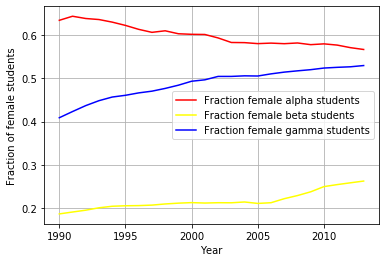

In [149]:
# Vraag 1.5 b
plt.plot(year, alpha_female / (alpha_male + alpha_female), label='Fraction female alpha students', color='red')
plt.plot(year, beta_female / (beta_male + beta_female), label='Fraction female beta students', color='yellow')
plt.plot(year, gamma_female / (gamma_male + gamma_female), label='Fraction female gamma students', color='blue')

plt.ylabel('Fraction of female students')
plt.xlabel('Year')

plt.legend()
plt.grid()

Vraag 1.6 a

Zie https://drive.google.com/file/d/1pyL_36P-s_9_QOODm7ZWzJObVzBvMMLw/view?usp=sharing voor de schets.

In [150]:
# Vraag 1.6 b
n_lagen = 4
balls = 100

richtingen = np.random.choice([-1, 1], n_lagen * balls)
richtingen = np.resize(richtingen, (balls, n_lagen))

posities = np.zeros((balls, 1))
posities = np.append(posities, np.cumsum(richtingen, axis=1), axis=1)

Text(0.5, 0, 'Pin')

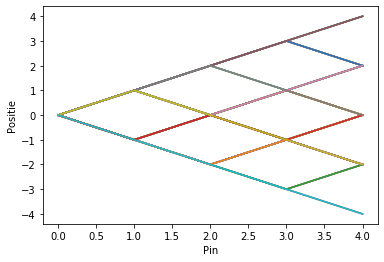

In [151]:
# Vraag 1.6 c
plt.plot(posities[:100].T)

plt.ylabel('Positie')
plt.xlabel('Pin')

[  3  59 277 135  26]


Text(0, 0.5, 'Frequentie')

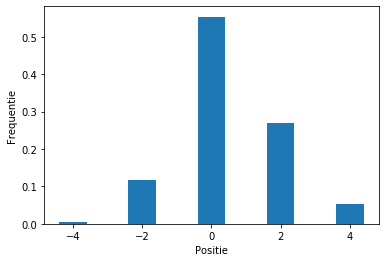

In [152]:
# Vraag 1.6 d
frequencies, grenzen = np.histogram(posities.T, np.linspace(-n_lagen - 1, n_lagen + 1, n_lagen + 2))
print(frequencies)

plt.bar(np.linspace(-n_lagen, n_lagen, n_lagen + 1), height=frequencies / np.sum(frequencies))
plt.xlabel('Positie')
plt.ylabel('Frequentie')

Vraag 1.6 e

Het ziet eruit als een normaal verdeling.

In [153]:
%%timeit -n 10

# Vraag 1.7 a
n_lagen = 100
balls = 1000

richtingen = np.random.choice([-1, 1], n_lagen * balls)
richtingen = np.resize(richtingen, (balls, n_lagen))

posities = np.zeros((balls, 1))
posities = np.append(posities, np.cumsum(richtingen, axis=1), axis=1)

frequencies, grenzen = np.histogram(posities.T, np.linspace(-n_lagen - 1, n_lagen + 1, n_lagen + 2))

sqrt(np.average(np.power(frequencies, 2)))

3.77 ms ± 164 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [156]:
%%timeit -n 10

# Vraag 1.7 b
n_lagen = 100
balls = 1000

richtingen = np.random.choice([-1, 1], n_lagen * balls)
richtingen = np.resize(richtingen, (balls, n_lagen))

posities = np.zeros((balls, 1))
posities = np.append(posities, np.cumsum(richtingen, axis=1), axis=1)

frequencies, grenzen = np.histogram(posities.T, np.linspace(-n_lagen - 1, n_lagen + 1, n_lagen + 2))

sum = 0
for i in range(len(frequencies)):
    frequencies[i] = frequencies[i] ** 2
    
for i in range(len(frequencies)):
    sum += frequencies[i]

average = sum / len(frequencies)
sqrt(average)

4.16 ms ± 516 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Vraag 1.7 c

We vinden voor de "goeie" methode dat het 3.77 ms ± 164 µs duurt. De langzame functie met de for-loops duurt 4.16 ms ± 516 µs. Dit is dus al ruim een kwart ms langer.
